# Overview

This notebook illustrates the process taken to find a model that can predict user sentiment with relative accuracy. Machine learning models are used to predict an individual's belief in climate change based on historical tweet data and the F1 score is the measure used to evaluate the accuracy of these models.

# Problem identification

### <center> Challenge: Climate Change Belief Analysis

#  2201FT_GM2 Classification

**Team GM2** was challenged by EDSA(Explore Data Science Academy), with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based solely on their novel tweet data. Supervised machine learning models, as we'll encounter inside this notebook, refer to models that improve automatically through experience. They are called "supervised", because they depend on some input to be able to produce a prediction.  

#### Background  

In a [research article](https://www.barrons.com/articles/two-thirds-of-north-americans-prefer-eco-friendly-brands-study-finds-51578661728) conducted, 19,000 customers from 28 countries where given a poll to find out how individual shopping decisions are changing. Nearly 70% of consumers in the U.S. and Canada find that it is important for a company or brand to be sustainable or eco-friendly. More than a third (40%) of the respondents globally said that they are purpose-driven consumers, who select brands based on how well they align with their personal beliefs.

Many companies are built around lessening their environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.  


#### Problem statement  

Build a machine learning model that is able to classify whether or not an individual believes in man-made climate change based on historical tweet data to increase insights about customers and inform future marketing strategies.

You can find the project overview [here](https://www.kaggle.com/competitions/edsa-climate-change-belief-analysis-2022/overview).

## Table of contents  
<a id='toc'></a>
1. [Importing packages](#imp_pac)  


2. [Importing the data](#imp_dat)  
    
    
3. [Data description](#ddescribe)   
     
    
4. [Preprocessing](#the_prep)    
    4.1. Extra feature extraction  
    4.2. Data cleaning
    
    
5. [Exploratory data analysis](#eda)  
    5.1. General analysis  
    5.2. Target variable analysis  
    5.3. Analysis of polarity
    
    
6. [Splitting the data](#split)  
    6.1. Split into response and predictor  
    6.2. Split data into training and testing sets
    
    
7. [Feature extraction](#vect)  
    7.1. Stopwords  
    7.2. N-grams  
    7.3. Build pipelines
    
    
8. [Model training](#train)  
    8.1. Logistic Regression  
    8.2. Naïve Bayes  
    8.3. SVM (Support Vector Machine)  
    8.4. Random Forest  
    8.5. KNN (K Nearest Neighbors)  
    8.6. Neural Networks

## 1. Importing packages 
<a id='imp_pac'></a>
[Back to table of contents](#toc)

This notebook requires some packages that may not be installed on your local machine. Below we provide a list of packages to be installed (if they are not yet installed) as well as the code to install them.  

Run the following commands within Git bash (Windows), terminal (Mac/Linux):  

- Comet_ml - `pip install comet_ml==3.1.9`    
- Wordcloud - `pip install wordcloud==1.7.0`  
- Emoji - `pip install emoji==0.5.4`  
- Pyspellchecker - `pip install pyspellchecker==0.5.4`  
- Ftfy - `pip install ftfy==5.7`  

In [4]:
!pip install comet_ml
!pip install seaborn
!pip install wordcloud
!pip install emoji
!pip install pyspellchecker
!pip install ftfy

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\F5471621\Anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\F5471621\\AppData\\Local\\Temp\\pip-install-02j4ejym\\wordcloud_d26810de77304e39850757a7284224f0\\setup.py'"'"'; __file__='"'"'C:\\Users\\F5471621\\AppData\\Local\\Temp\\pip-install-02j4ejym\\wordcloud_d26810de77304e39850757a7284224f0\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\F5471621\AppData\Local\Temp\pip-wheel-jetbvn15'
       cwd: C:\Users\F5471621\AppData\Local\Temp\pip-install-02j4ejym\wordcloud_d26810de77304e39850757a7284224f0\
  Complete output (20 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\li


  Using cached wordcloud-1.8.1.tar.gz (220 kB)
  Running setup.py clean for wordcloud
Failed to build wordcloud
    Running setup.py install for wordcloud: started
    Running setup.py install for wordcloud: finished with status 'error'


In [5]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="OVppsmdDB0EjLTt0aOW7piYjY",
    project_name="climate-change-version-control",
    workspace="gm2",
)

# Run your code and go to /

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/gm2/climate-change-version-control/35b384c3b0284aa28f54674005ba7bfa



In [6]:
# Packages for data analysis
import numpy as np
import pandas as pd
from time import time

# Packages for visualisations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from PIL import Image


# Packages for preprocessing
import re
import string
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.probability import FreqDist
import nltk
import emoji
from ftfy import fix_text
from spellchecker import SpellChecker 
from nltk.stem.snowball import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import itertools
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

# Packages for training models
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Packages for hyperparameter optimisation
from sklearn.model_selection import GridSearchCV

# Packages for evaluating model accuracy
from sklearn.metrics import f1_score 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.preprocessing import label_binarize

# Packages for saving models
import pickle

## 2. Importing the data
<a id='imp_dat'></a>
[Back to table of contents](#toc)

In [7]:
#Import data
test = pd.read_csv("test_with_no_labels.csv")
train = pd.read_csv("train.csv")
sample = pd.read_csv("sample_submission.csv")

In [8]:
train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [9]:
test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \r\nPu...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [10]:
sample.head()

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,1


## 3. Data description
<a id='ddescribe'></a>
[Back to table of contents](#toc)

The datasets that will be used in this classification project aggregates tweets pertaining to climate change, collected between Apr 27, 2015 and Feb 21, 2018. The train dataset consists of 3 columns; "tweetid", "sentiment" and "message", where we set "tweetid" to be the index of the dataset. A description of each variable in the dataset is given below.  
### Training set
**Variable definitions:**  

- **tweetid** - Unique Twitter ID .
- **message** - Tweet body.       
- **sentiment** - Sentiment of tweet.  

**Each tweet is then labeled as one of the following classes:**  
 
    
| **Class** | **Tag** | **Description** |
|:---------:|:----------------:|:----------------|
|   **2**   | **News** |The tweet links to factual news about climate change |
|   **1**   | **Pro** |The tweet supports the belief of man-made climate change |
|   **0**   | **Neutral** |The tweet neither supports nor refutes the belief of man-made climate change |
|  **-1**   | **Anti** |The tweet does not believe in man-made climate change |  

### Testing set  
During testing we do not have access to the **tweetid** variable, but the testing dataset remains the same as the training dataset otherwise.  

### Data types 

Let's get quick overview of the datasets we will be working with throughout the notebook. The output below contains the shape of the dataset, a list of all columns with their data types and the number of non-null values present in each column.  

**Train data**  

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


The train dataset has 15819 entries, contains no null entries, and the data types for "sentiment" and "message" are integer and object respectively.

**Test data**

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB


The test dataset has 10546 entries, contains no null entries, and the variable "message" has the object data type.

## 4. Preprocessing
<a id='the_prep'></a>
[Back to table of contents](#toc)

In [13]:
#Data Preprocessing
#Identifying missing values and data types
train.isna().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   sentiment  15819 non-null  bool 
 1   message    15819 non-null  bool 
 2   tweetid    15819 non-null  bool 
dtypes: bool(3)
memory usage: 46.5 KB


In [14]:
test.isna().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   message  10546 non-null  bool 
 1   tweetid  10546 non-null  bool 
dtypes: bool(2)
memory usage: 20.7 KB


In [15]:
# Part of Speech for modeling
def POS(word):
    pos_counts = Counter()
    probable_part_of_speech = wordnet.synsets(word)
    pos_counts["n"] = len([i for i in probable_part_of_speech if i.pos()=="n"])
    pos_counts["v"] = len([i for i in probable_part_of_speech if i.pos()=="v"])
    pos_counts["a"] = len([i for i in probable_part_of_speech if i.pos()=="a"])
    pos_counts["r"] = len([i for i in probable_part_of_speech if i.pos()=="r"])
    part_of_speech = pos_counts.most_common(1)[0][0]
    return part_of_speech

**Extract feature extraction**

The first feature we will extract is the sentiment of a tweet. We determine the sentiment of a tweet by using python's VADER library. This feature could be useful since we would expect tweets classified as `Anti` to have a more negative tone than tweets classified as `Pro`. We'll start by writing a function, (`sentiment_score`), that takes a text string as input and determines its sentiment, i.e. negative, positive or neutral. Since these tweets do not have a wide range when it comes to sentiment scores (rarely more than 0.4) we decided to classify all tweets with scores of less than -0.05 as negative, scores between -0.05 and 0.05 are classified as neutral and a score of more than 0.05 indicates a positive tweet.

In [16]:
# Function to extract sentiment
def sentiment_score(text):
    """ A function that determines the sentiment of a text string.

        Parameters
        ----------
        text: Text string.

        Returns
        -------
        sentiment:  String indicating the sentiment of the input string.
    """
    
    sid = SentimentIntensityAnalyzer()
    s = sid.polarity_scores(text)['compound']
    if s<-0.05:
        sentiment='negative'
    elif s>0.05:
        sentiment='positive'
    else:
        sentiment='neutral'
    
    return sentiment

Twitter handles could be a second useful feature. Sentiment will help us a lot with classifying classes like `Anti`, `Neutral` and `Pro`, but we would find it more difficult to classify `News` using these sentiments. Twitter handles could help the model distinguish between the `News` class and the other classes. We assume that tweets classified as `News` would probably have been extracted from news accounts and therefore have news related handles.  

We now extract all **unique** Twitter handles found in tweets within the `News` class.

In [17]:
# Extract all unique news related handles into a list
df = train.copy()
df.sort_index(inplace=True)
n_temp = [re.findall(r'@[\w]+',df['message'].iloc[i]) for i,x in enumerate(df['sentiment']) if x==2]
news = [x for x in n_temp if x!=[]]

# Only keep the unique values inside the list
news = sorted(list(set(itertools.chain.from_iterable(news))))

In [18]:
print(f'First 5 entries: {news[:5]} \nLast 5 entries: {news[-5:]}')

First 5 entries: ['@02Cents0', '@100isNow', '@1306Chomley', '@1o5CleanEnergy', '@233liveOnline'] 
Last 5 entries: ['@yceek', '@yearsofliving', '@yicaichina', '@zsstevens', '@Ã']


Looking at the first and last 5 entries inside our list we see our hunch was correct. We can see news channels like `@233liveOnline` and organizations like `@100isNow` (better known as "The Solutions Project"; who have made it clear that their goal is to radically transform how people understand climate change and the role we all can play to solve it. There are also handles from influential people like `@zsstevens` (Stewart Stevenson); former Scottish Minister for Environment and Climate Change who is currently still part of the Environment, Climate Change and Land Reform Committee for the Scottish Parliament.  

We have now created our features and move on to cleaning the text data. 


### Remove Unnecessary Information on Message

#### Contractions

The `message` column contains some contracted words such as *can't* and *don't*. As part of the cleaning process these words will be replaced with their expanded words that do not contain any omission. We do this because we will need to tokenize the text later on. We assume that a model would have an easier time using tokens like `can` and `not` than `can` and `'t`. To help with this transformation, a dictionary (`contractions`) is created, that contain possible contractions and their corresponding full words.

In [19]:
# Dictionary of contracted words
contractions = {
"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"wasn't": "was not",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we'll":"we will",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
}

Now let's replace the contracted words by their expanded alternatives.

In [20]:
# Replace contracted words with full word
df['message'] = [' '.join([contractions[w.lower()] if w.lower() in contractions.keys() else w for w in raw.split()]) 
                       for raw in df['message']]

#### Lowercase

To help our model, we will be converting all text to lowercase. We work with lower cased data to remove the noise from capitalised words. This is due to the computer seeing uppercased words as different from lower cased words. If this transformation is not applied we run the risk of the model possibly classifying cases like `Snowball` and `snowball` differently. By transforming we help the model understand that those two words are in fact the same.

In [21]:
# Lower case all words to remove noise from Capital words. Capital words may be seen as different from lower case words
df['message'] = df['message'].str.lower()


#### Encoding

Tweet data can also include bad unicode. For example, where a person wants so say `José Florés` or use a `(—)`, it ends up being `JosÃ© Florés` or `â€”` instead. These issues can make it hard for the model to process the data. There is a package in python that takes care of these issues for us. The ftfy(fixed this for you) package takes all the bad unicode and outputs the good unicode. So let's let the package fix these problems for us.

In [22]:
df['message'] = df['message'].apply(lambda x: fix_text(x))


#### Emojis

The `message` column may also contain emojis, ex. 👨🏽‍💻. As we can see, alone they're just symbols and don't have a word association to them. This makes them hard to interpret and also makes them useless to our model. But emojis could potentially be useful in the modeling process. So instead of removing them, we'll be replacing them with the word that describes them.

In [23]:
# Replace emojis with their word meaning
df['message'] = df['message'].apply(lambda x: emoji.demojize(x))

#### Shortened words/Slang

With tweets data a lot of shortened words like *abt* are used instead of the full words *about*. This can make it difficult for the model to process these words. We will replace the shortened words with their corresponding full word. To help with this transformation, a dictionary, (`short`), of possible shortened words and their corresponding full words is given below.

In [24]:
# Replace shortened words with full words
short = {' BD ': ' Big Deal ',
 ' abt ':' about ',
 ' ab ': ' about ',
 ' fav ': ' favourite ',
 ' fab ': ' fabulous ',
 ' smh ': ' shaking my head ',
 ' u ': ' you ',
 ' c ': ' see ',
 ' anon ': ' anonymous ',
 ' ac ': ' aircon ',
 ' a/c ': ' aircon ',
 ' yo ':' year old ',
 ' n ':' and ',
 ' nd ':' and ',
 ' 2 ': ' to ',
 ' w ': ' with ',
 ' w/o ': ' without ',
 ' r ': ' are ',
 ' rip ':' rest in peace ',
 ' 4 ' : ' for ',
' BF ': ' Boyfriend ',
' BRB ': ' Be Right Back ',
' BTW ': ' By The Way ',
' GF ': ' Girlfriend ',
' HBD ': ' Happy Birthday ',
' JK ': ' Just Kidding ',
' K ':' Okay ',
' LMK ': ' Let Me Know ',
' LOL ': ' Laugh Out Loud ',
' HA ':' laugh ',
' MYOB ': ' Mind Your Own Business ',
' NBD ': ' No Big Deal ',
' NVM ': ' Nevermind ',
' Obv ':' Obviously ',
' Obvi ':' Obviously ',
' OMG ': ' Oh My God ',
' Pls ': ' Please ',
' Plz ': ' Please ',
' Q ': ' Question ', 
' QQ ': ' Quick Question ',
' RLY ': ' Really ',
' SRLSY ': ' Seriously ',
' TMI ': ' Too Much Information ',
' TY ': ' Thank You, ',
' TYVM ': ' Thank You Very Much ',
' YW ': ' You are Welcome ',
' FOMO ': ' Fear Of Missing Out ',
' FTFY ': ' Fixed This For You ',
' FTW ': ' For The Win ',
' FYA ': ' For Your Amusement ',
' FYE ': ' For Your Entertainment ',
' GTI ': ' Going Through It ',
' HTH ': ' Here to Help ',
' IRL ': ' In Real Life ',
' ICYMI ': ' In Case You Missed It ',
' ICYWW ': ' In Case You Were Wondering ',
' NBC ': ' Nobody Cares Though ',
' NTW ': ' Not To Worry ',
' OTD ': ' Of The Day ',
' OOTD ': ' Outfit Of The Day ',
' QOTD ': ' Quote of the Day ',
' FOTD ': ' Find Of the Day ',
' POIDH ': ' Pictures Or It Did ntt Happen ',
' YOLO ': ' You Only Live Once ',
' AFAIK ': ' As Far As I Know ',
' DGYF ': ' Dang Girl You Fine ',
' FWIW ': ' For What It is Worth ',
' IDC ': ' I Do not Care ',
' IDK ': ' I Do not Know ',
' IIRC ': ' If I Remember Correctly ',
' IMHO ': ' In My Honest Opinion ',
' IMO ': ' In My Opinion ',
' Jelly ': ' Jealous ',
' Jellz ': ' Jealous ',
' JSYK ': ' Just So You Know ',
' LMAO ': ' Laughing My Ass Off ',
' LMFAO ': ' Laughing My Fucking Ass Off ',
' NTS ': ' Note to Self ',
' ROFL ': ' Rolling On the Floor Laughing ',
' ROFLMAO ': ' Rolling On the Floor Laughing My Ass Off ',
' SMH ': ' Shaking My Head ',
' TBH ': ' To Be Honest ',
' TL;DR ':  ' Too Long; Did not Read ',
' TLDR ':  ' Too Long; Did not Read ',
' YGTR ': ' You Got That Right ',
' AYKMWTS ': ' Are You Kidding Me With This Shit ',
' BAMF ': ' Bad Ass Mother Fucker ',
' FFS ': ' For Fuck Sake ',
' FML ': ' Fuck My Life ',
' HYFR ': ' Hell Yeah Fucking Right ',
' IDGAF ': ' I Do not Give A Fuck ',
' NFW ': ' No Fucking Way ',
' PITA ': ' Pain In The Ass ',
' POS ': ' Piece of Shit ',
' SOL ': ' Shit Outta Luck ',
' STFU ': ' Shut the Fuck Up ',
' TF ': ' The Fuck ',
' WTF ': ' What The Fuck ',
' BFN ': ' Bye For Now ',
' CU ': ' See You ',
' IC ': ' I see ',
' CYL ': ' See You Later ',
' GTG ': ' Got to Go ',
' OMW ': ' On My Way ',
' RN ': ' Right Now ',
' TTYL ': ' Talk To You Later ',
' TYT ': ' Take Your time ',
' CC ': ' Carbon Copy ',
' CX ': ' Correction ',
' DM ': ' Direct Message ',
' FB ': ' Facebook ',
' FBF ': ' Flash-Back Friday ',
' FF ': ' Follow Friday ',
' HT ': ' Tipping my hat ',
' H/T ': ' Tipping my hat ',
' IG ': ' Instagram ',
' Insta ': ' Instagram ',
' MT ':' Modified Tweet ',
' OH ': ' Overheard ',
' PRT ': ' Partial Retweet ',
' RT ': ' Retweet ',
'rt ' : ' retweet ',
' SO ':' Shout Out ',
' S/O ': ' Shout Out ',
' TBT ': ' Throw-Back Thursday ',
' AWOL ': ' Away While Online ',
' BFF ': ' Best Friend Forever ',
' NSFW ': ' Not Safe For Work ',
' OG ': ' Original Gangster ',
' PSA ': ' Public Service Announcement ',
' PDA ': ' Public Display of Affection '}

short = dict((key.lower(), value.lower()) for key,value in short.items())

Now let's replace the shortened words by their full alternatives.

In [25]:
# Replacing shortened words with full words
for word in short.keys():
    df['message'] = df['message'].apply(lambda x: re.sub(word,short[word],x))

#### Punctuation

Other than with sentiment analysis, where some punctuation is useful, punctuations, symbols and numbers tend to be rendered useless in modeling. As they are not specific to certain classes, they add no explanatory power and can therefore be removed.

In [26]:
# Remove punctuation
df['message'] = df['message'].apply(lambda x: re.sub(r"[^A-Za-z ]*",'',x))

#### Vowels repeated at least 3 times

It is not uncommon for people to stretch words when typing. For example, instead of using `cool` the word is stretched to `cooooool`. Words are of no use to the model in this form, so we wish to shrink them back to their appropriate size. We'll do this by removing any extra vowels that are repeated at least three times. Note that we are aware that words like `nooooo` should be reduced to only one vowel to result in `no`. The reason we reduce to two vowels is to reduce the probability of creating misspelled words that could mean something else in their transformed form. A good example would be `beeeee`. Where `bee` and `be` would mean two completely different things.

In [27]:
# Remove vowels repeated at least 3 times ex. Coooool > Cool
df['message'] = df['message'].apply(lambda x: re.sub(r'([aeiou])\1+', r'\1\1', x))

#### Sequences indicating laughing

It is also very common for people to express laughter in different ways. A few of these ways are a sequence of repeated letters like `haha` or `lolol`. For these sequences to add more value to our model we'll change them to the word `laugh`, which the model can easily understand.

In [28]:
# Replace sequence of 'h' and 'a', as well as 'lol' with 'laugh'
df['message'] = df['message'].apply(lambda x: re.sub(r' ha([ha]) *', r'laugh', x))
df['message'] = df['message'].apply(lambda x: re.sub(r' he([he]) *', r'laugh', x))
df['message'] = df['message'].apply(lambda x: re.sub(r' lol([ol]) *', r'laugh', x))
df['message'] = df['message'].apply(lambda x: re.sub(r' lo([o])*l ', r'laugh', x))

In [29]:
df

,sentiment,message,tweetid
0,1,polyscimajor epa chief does not think carbon d...,625221
1,1,it is not like we lack evidence of anthropogen...,126103
2,2,retweet rawstory researchers say we have thre...,698562
3,1,todayinmaker wired was a pivotal year in the...,573736
4,1,retweet soynoviodetodas it is and a racist s...,466954
...,...,...,...
15814,1,retweet ezlusztig they took down the material...,22001
15815,2,retweet washingtonpost how climate change cou...,17856
15816,0,notiven rt nytimesworld what does trump actual...,384248
15817,-1,retweet sarasmiles hey liberals the climate c...,819732


In [30]:
def extractor(df):
    # Extract hashtags
    tweets = df['message']
    df['hashtags'] = df.message. str.lower().str.findall(r'#.*?(?=\s|$)')
    htags = df['hashtags']
    df['hashtags'] = htags.apply(lambda x: np.nan if len(x) == 0 else x)
    
    # Extract mentions
    df['mentions'] = df.message. str.lower().str.findall(r'@\w*')
    mtags = df['mentions']
    df['mentions'] = mtags.apply(lambda x: np.nan if len(x) == 0 else x)
    
    # Extract url
    df['url'] = df.message. str.lower().str.findall(r'http\S+|www.\S+')
    urltags = df['url']
    df['url'] = urltags.apply(lambda x: np.nan if len(x) == 0 else x)
    
    return df

In [31]:
extractor(df)

,sentiment,message,tweetid,hashtags,mentions,url
0,1,polyscimajor epa chief does not think carbon d...,625221,NaN,NaN,[httpstcoyelvcefxkc]
1,1,it is not like we lack evidence of anthropogen...,126103,NaN,NaN,NaN
2,2,retweet rawstory researchers say we have thre...,698562,NaN,NaN,"[httpstcowdtkdurf, httpstcozanpt]"
3,1,todayinmaker wired was a pivotal year in the...,573736,NaN,NaN,[httpstcowotxtlcd]
4,1,retweet soynoviodetodas it is and a racist s...,466954,NaN,NaN,NaN
...,...,...,...,...,...,...
15814,1,retweet ezlusztig they took down the material...,22001,NaN,NaN,[https]
15815,2,retweet washingtonpost how climate change cou...,17856,NaN,NaN,[httpstcorpfgvbplq]
15816,0,notiven rt nytimesworld what does trump actual...,384248,NaN,NaN,[httpstcomp]
15817,-1,retweet sarasmiles hey liberals the climate c...,819732,NaN,NaN,NaN


In [32]:
# Clean tweets
def clean_tweets(df):
    # tokenizing the tweets
    clean_tweets = df['message'].apply(TweetTokenizer().tokenize)

    # remove punctuation
    clean_tweets = clean_tweets.apply(lambda x : [token for token in x if token not in string.punctuation])

    # removing digits from the tweets
    clean_tweets = clean_tweets.apply(lambda x: [token for token in x if token not in list(string.digits)])

    # lastly we remove all one character tokens
    clean_tweets = clean_tweets.apply(lambda x: [token for token in x if len(token) > 1])
    
    df['cleaned_tweets'] = clean_tweets
    
    return df['cleaned_tweets']

In [33]:
clean_tweets(df)

0        [polyscimajor, epa, chief, does, not, think, c...
1        [it, is, not, like, we, lack, evidence, of, an...
2        [retweet, rawstory, researchers, say, we, have...
3        [todayinmaker, wired, was, pivotal, year, in, ...
4        [retweet, soynoviodetodas, it, is, and, racist...
                               ...                        
15814    [retweet, ezlusztig, they, took, down, the, ma...
15815    [retweet, washingtonpost, how, climate, change...
15816    [notiven, rt, nytimesworld, what, does, trump,...
15817    [retweet, sarasmiles, hey, liberals, the, clim...
15818    [retweet, chetcannon, kurteichenwalds, climate...
Name: cleaned_tweets, Length: 15819, dtype: object

In [34]:
#Removing Stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')

stop = stopwords.words('english')

# Convert to lower case
df['cleaned_tweets'] = df['cleaned_tweets'].apply(lambda x: [word.lower() for word in x])

# Remove stopword
df['no_stopwords'] = df['cleaned_tweets'].apply(lambda x: [item for item in x if item not in stop])

df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\F5471621\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,sentiment,message,tweetid,hashtags,mentions,url,cleaned_tweets,no_stopwords
0,1,polyscimajor epa chief does not think carbon d...,625221,NaN,NaN,[httpstcoyelvcefxkc],"[polyscimajor, epa, chief, does, not, think, c...","[polyscimajor, epa, chief, think, carbon, diox..."
1,1,it is not like we lack evidence of anthropogen...,126103,NaN,NaN,NaN,"[it, is, not, like, we, lack, evidence, of, an...","[like, lack, evidence, anthropogenic, global, ..."
2,2,retweet rawstory researchers say we have thre...,698562,NaN,NaN,"[httpstcowdtkdurf, httpstcozanpt]","[retweet, rawstory, researchers, say, we, have...","[retweet, rawstory, researchers, say, three, y..."
3,1,todayinmaker wired was a pivotal year in the...,573736,NaN,NaN,[httpstcowotxtlcd],"[todayinmaker, wired, was, pivotal, year, in, ...","[todayinmaker, wired, pivotal, year, war, clim..."
4,1,retweet soynoviodetodas it is and a racist s...,466954,NaN,NaN,NaN,"[retweet, soynoviodetodas, it, is, and, racist...","[retweet, soynoviodetodas, racist, sexist, cli..."


In [35]:
#Most Frequent Words
from collections import Counter
cnt = Counter()
for message in df['no_stopwords'].values:
    for word in message:
        cnt[word] += 1
        

In [36]:
#Map the sentiment class by name
df['sent_labels']  = df['sentiment'].map({-1: 'Anti',0:'Neutral', 1:'Pro', 2:'News'})

In [37]:
#The length of each raw tweet
df['text_length'] = df['message'].apply(lambda x: len(x))

**Separate Datframes of Tweets for each Sentiment**

In [38]:
# Dataframe for neutral tweets
neutral_df = df[df['sentiment'] == 0]
neutral_df.head()

,sentiment,message,tweetid,hashtags,mentions,url,cleaned_tweets,no_stopwords,sent_labels,text_length
19,0,calum tweets about reunitingish with the cast ...,547924,NaN,NaN,NaN,"[calum, tweets, about, reunitingish, with, the...","[calum, tweets, reunitingish, cast, sees, repl...",Neutral,137
22,0,we also met this guy he let us in on some trut...,67545,NaN,NaN,[httpstcoqyomcmzaj],"[we, also, met, this, guy, he, let, us, in, on...","[also, met, guy, let, us, truth, climate, chan...",Neutral,114
30,0,jnpftw are these the same scientists that deno...,365051,NaN,NaN,NaN,"[jnpftw, are, these, the, same, scientists, th...","[jnpftw, scientists, denounce, climate, change...",Neutral,84
39,0,we ve dealt with simple issues like climate ch...,403368,NaN,NaN,NaN,"[we, ve, dealt, with, simple, issues, like, cl...","[dealt, simple, issues, like, climate, change,...",Neutral,110
43,0,retweet andrewsharp win probability is bullsh...,326916,NaN,NaN,NaN,"[retweet, andrewsharp, win, probability, is, b...","[retweet, andrewsharp, win, probability, bulls...",Neutral,124


In [39]:
# Dataframe for pro tweets
pro_df = df[df['sentiment'] == 1]
pro_df.head()

,sentiment,message,tweetid,hashtags,mentions,url,cleaned_tweets,no_stopwords,sent_labels,text_length
0,1,polyscimajor epa chief does not think carbon d...,625221,NaN,NaN,[httpstcoyelvcefxkc],"[polyscimajor, epa, chief, does, not, think, c...","[polyscimajor, epa, chief, think, carbon, diox...",Pro,130
1,1,it is not like we lack evidence of anthropogen...,126103,NaN,NaN,NaN,"[it, is, not, like, we, lack, evidence, of, an...","[like, lack, evidence, anthropogenic, global, ...",Pro,63
3,1,todayinmaker wired was a pivotal year in the...,573736,NaN,NaN,[httpstcowotxtlcd],"[todayinmaker, wired, was, pivotal, year, in, ...","[todayinmaker, wired, pivotal, year, war, clim...",Pro,85
4,1,retweet soynoviodetodas it is and a racist s...,466954,NaN,NaN,NaN,"[retweet, soynoviodetodas, it, is, and, racist...","[retweet, soynoviodetodas, racist, sexist, cli...",Pro,118
5,1,worth a read whether you do or do not believe ...,425577,NaN,NaN,"[httpstcogglzvnyjun, httpstcoafemahj]","[worth, read, whether, you, do, or, do, not, b...","[worth, read, whether, believe, climate, chang...",Pro,98


In [40]:
# Dataframe for anti tweets
anti_df = df[df['sentiment'] == -1]
anti_df.head()

,sentiment,message,tweetid,hashtags,mentions,url,cleaned_tweets,no_stopwords,sent_labels,text_length
28,-1,sally kohns latest evidence of climate change ...,355491,NaN,NaN,[httpstcomhkzoglvt],"[sally, kohns, latest, evidence, of, climate, ...","[sally, kohns, latest, evidence, climate, chan...",Anti,135
46,-1,realdonaldtrump carbon tax is a globalist idea...,61141,NaN,NaN,NaN,"[realdonaldtrump, carbon, tax, is, globalist, ...","[realdonaldtrump, carbon, tax, globalist, idea...",Anti,133
48,-1,retweet stevesgoddard we had winds close to ...,719523,NaN,NaN,NaN,"[retweet, stevesgoddard, we, had, winds, close...","[retweet, stevesgoddard, winds, close, mph, ar...",Anti,133
56,-1,misslizzynj laughing my ass off facewithtearso...,911385,NaN,NaN,NaN,"[misslizzynj, laughing, my, ass, off, facewith...","[misslizzynj, laughing, ass, facewithtearsofjo...",Anti,150
57,-1,retweet dawndawn this is one of arnold schwar...,768263,NaN,NaN,NaN,"[retweet, dawndawn, this, is, one, of, arnold,...","[retweet, dawndawn, one, arnold, schwarzenegge...",Anti,132


In [41]:
# Dataframe for news tweets
news_df = df[df['sentiment'] == 2]
news_df.head()

,sentiment,message,tweetid,hashtags,mentions,url,cleaned_tweets,no_stopwords,sent_labels,text_length
2,2,retweet rawstory researchers say we have thre...,698562,NaN,NaN,"[httpstcowdtkdurf, httpstcozanpt]","[retweet, rawstory, researchers, say, we, have...","[retweet, rawstory, researchers, say, three, y...",News,129
12,2,retweet tveitdal we only have a percent chan...,454673,NaN,NaN,"[httpstcoxubtqnxhkk, httpstcoof]","[retweet, tveitdal, we, only, have, percent, c...","[retweet, tveitdal, percent, chance, avoiding,...",News,129
14,2,fossil fuel giant exxonmobil misled the public...,658092,NaN,NaN,[httpstcoofcwsuex],"[fossil, fuel, giant, exxonmobil, misled, the,...","[fossil, fuel, giant, exxonmobil, misled, publ...",News,111
26,2,bangladesh confronting climate change head on ...,365291,NaN,NaN,"[httpstcomtqenbqdut, httpstcoitgkuxgefg]","[bangladesh, confronting, climate, change, hea...","[bangladesh, confronting, climate, change, hea...",News,83
32,2,retweet latimes atmospheric rivers fueled by ...,143471,NaN,NaN,"[httpstcoplzbhluk, httpst]","[retweet, latimes, atmospheric, rivers, fueled...","[retweet, latimes, atmospheric, rivers, fueled...",News,133


## 5. Exploratory data analysis
<a id='eda'></a>
[Back to table of contents](#toc)

Structure of Data

In evaluating the structure of the data, we utilized the .shape method to see the number of rows and columns of the dataframe. The dataframe provided has 15819 rows and 10 rows

In [42]:
# look at data statistics
df.shape

(15819, 10)

The function dataframe. isnull(). sum(). sum() returns the number of missing values in the data set.

In [43]:
test.isnull().sum()

message    0
tweetid    0
dtype: int64

After checking the number of nulls, we then conclude that we have no null values


In [44]:
train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

Test Description!

The describe() method returns description of the data in the DataFrame. If the DataFrame contains numerical data, the description contains these information for each column: count - The number of not-empty values. mean - The average (mean) value. std - The standard deviation.

In [45]:
test.describe()

,tweetid
count,10546.000000
mean,496899.936943
std,288115.677148
min,231.000000
25%,246162.500000
50%,495923.000000
75%,742250.000000
max,999983.000000


Train Description!

In [46]:
train.describe()

,sentiment,tweetid
count,15819.000000,15819.000000
mean,0.917504,501719.433656
std,0.836537,289045.983132
min,-1.000000,6.000000
25%,1.000000,253207.500000
50%,1.000000,502291.000000
75%,1.000000,753769.000000
max,2.000000,999888.000000


lets check how a sample tweet look like

Counts of words in each category

property DataFrame. iloc. Purely integer-location based indexing for selection by position. . iloc[] is primarily integer position based (from 0 to length-1 of the axis), but may also be used with a boolean array.

In [47]:
# Print a Sample tweet
tweet = df.iloc[4,1]
print(tweet)

 retweet soynoviodetodas it is  and a racist sexist climate change denying bigot is leading in the polls electionnight


The len() function returns the number of items in an object. When the object is a string, the len() function returns the number of characters in the string.

The sum() function returns a number, the sum of all items in an iterable.

In [48]:
# Checking whether a character is white-space character or not
print(len(df['message']))
print(sum(df['message'].apply(lambda x: x.isspace())))

15819
0


In [49]:
!pip install langdetect

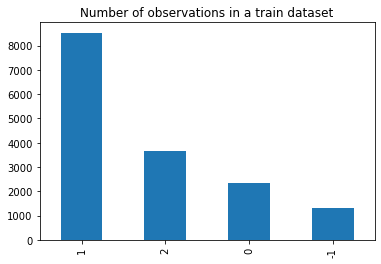

In [50]:
df.sentiment.value_counts().plot(kind='bar')
plt.title('Number of observations in a train dataset')
plt.show()

The graph above shows an imbalance of texts

Bar graphs are the pictorial representation of data (generally grouped), in the form of vertical or horizontal rectangular bars, where the length of bars are proportional to the measure of data.

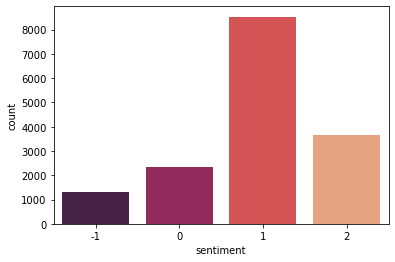

In [51]:
sns.countplot(x='sentiment',data=df,palette='rocket')
plt.show()

A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable

Check the distribution of data

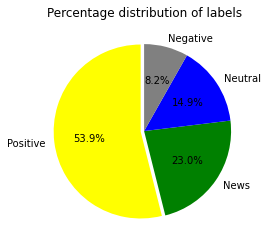

In [52]:
#Making copy of train dataset
train_df = df.copy()
# Labeling the target
train_df['sentiment'] = [['Negative', 'Neutral', 'Positive', 'News'][x+1] for x in train_df['sentiment']]

# checking the numerical distribution
values = train_df['sentiment'].value_counts()/train_df.shape[0]
labels = (train_df['sentiment'].value_counts()/train_df.shape[0]).index
colors = ['yellow', 'green', 'blue', 'grey']
plt.pie(x=values, labels=labels, autopct='%1.1f%%', startangle=90, explode= (0.04, 0, 0, 0), colors=colors)
plt.title('Percentage distribution of labels')
plt.show()

A pie chart is a circle that is divided into areas, or slices. Each slice represents the count or percentage of the observations of a level for the variable. Pie charts are often used in business.

Plot list of common words

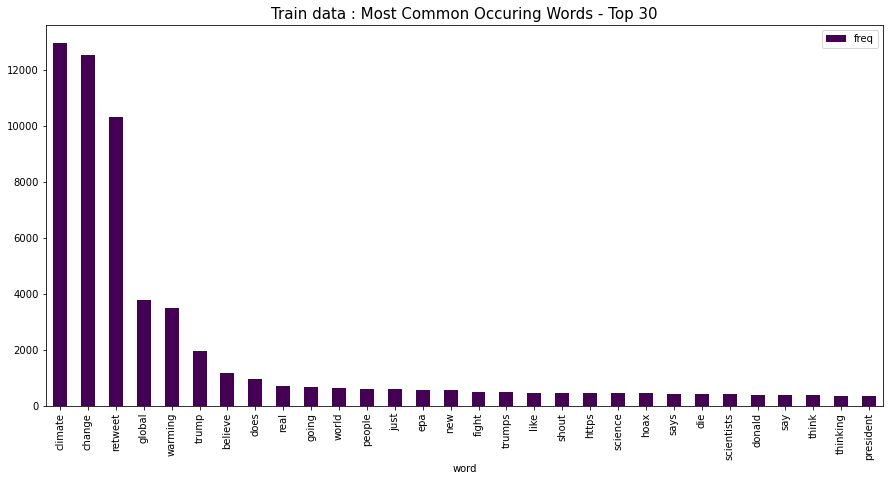

In [53]:
#convert the test to numerical values 
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train_df.message)

sum_words = words.sum(axis=0)
#create a frequency of most occuring words
words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
#create a dataframe of the words and frequency 
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = '#440154')
plt.title("Train data : Most Common Occuring Words - Top 30",size=15)
plt.show()

We can see we used "climate" and "change" more than twice other words, followed by "global" and "warning", then "trump" while others are almost the same.

Countvectorizer makes it easy for text data to be used directly in machine learning and deep learning models such as text classification.

Below we are displaying density's plot we will be using the Matplotlib library and create a list of all numerical features to visualise these features at the same time.

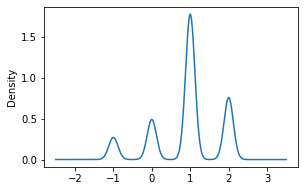

In [54]:
train["sentiment"].plot(kind='density', subplots=True, layout=(3, 2), sharex=False, figsize=(10, 10));

### HASHTAGS

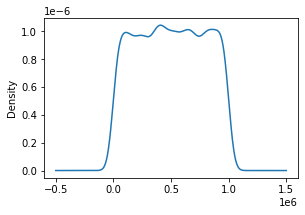

In [55]:
df['tweetid'].plot(kind='density', subplots=True, layout=(3, 2), sharex=False, figsize=(10, 10));

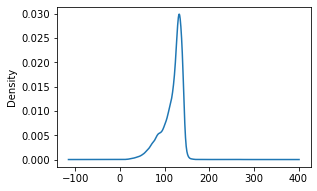

In [56]:
df["text_length"].plot(kind='density', subplots=True, layout=(3, 2), sharex=False, figsize=(10, 10));

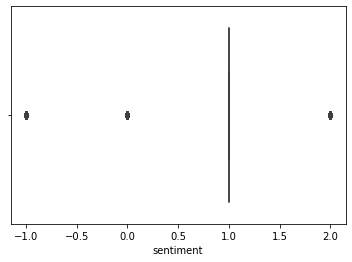

In [57]:
sns.boxplot(x='sentiment', data=df);

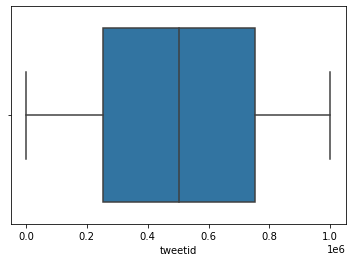

In [58]:
sns.boxplot(x='tweetid', data=df);

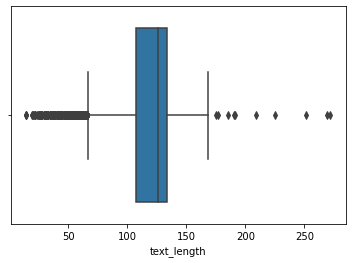

In [59]:
sns.boxplot(x='text_length', data=df);

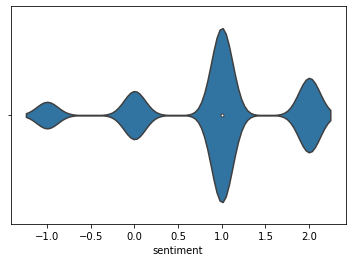

In [60]:
sns.violinplot(x='sentiment', data=train);

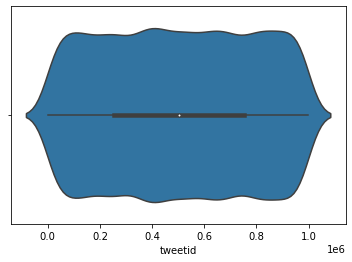

In [61]:
sns.violinplot(x='tweetid', data=train);

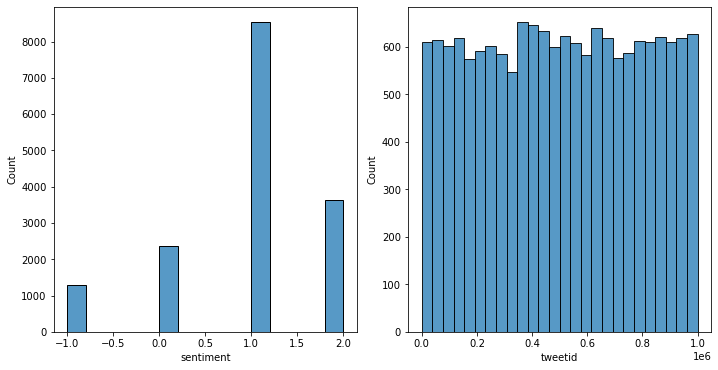

In [62]:
cols = 3
rows = 3
num_cols = train.select_dtypes(exclude='object').columns
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.histplot(x = train[col], ax = ax)
    
fig.tight_layout()  
plt.show()

<AxesSubplot:xlabel='sentiment', ylabel='Count'>

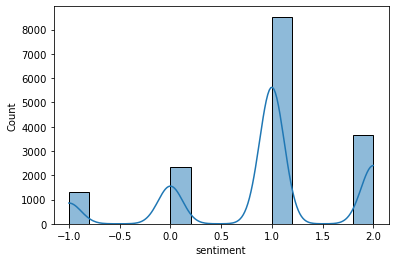

In [63]:
sns.histplot(x='sentiment', data=train, kde=True)

<AxesSubplot:xlabel='tweetid', ylabel='Count'>

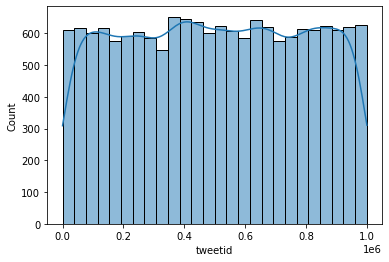

In [64]:
sns.histplot(x='tweetid', data=train, kde=True)

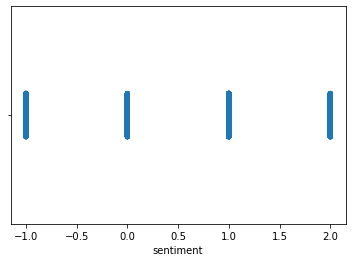

In [65]:
sns.stripplot(x=train["sentiment"]);

<AxesSubplot:xlabel='tweetid', ylabel='sentiment'>

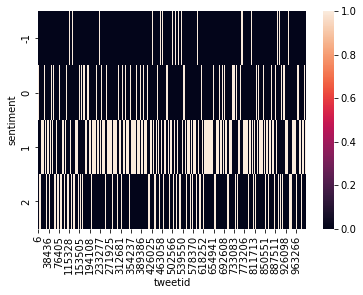

In [66]:
sns.heatmap(pd.crosstab(train['sentiment'], train['tweetid']))

Even though we removed the hastags but we would want to include them in the EDA since they are common use texts in twitter

In [49]:
#EXTRACT HASTAGS
def hashtag_extact(tweets):
    hashtags=[]
    #loop words in the tweet
    for tweet in tweets:
        ht=re.findall(r"#(\w+)",tweet)
        hashtags.append(ht)
    return hashtags

Now we extract the hashtags from each of the four sentiment classes

From the train data we sport the null values from hashtags, mention and url




COUNT OF TEXTS IN EACH CATEGORY

In [69]:
print("IN TRAIN SET...")
temp1 = df.groupby('sentiment').count()['cleaned_tweets'].reset_index().sort_values(by='cleaned_tweets',ascending=False)
temp1.style.background_gradient(cmap='Purples')

IN TRAIN SET...


,sentiment,cleaned_tweets
2,1,8530
3,2,3640
1,0,2353
0,-1,1296


### -----

In [ ]:
# Calculating plot values
a = news_df['sentiment'].count()
b = anti_df['sentiment'].count()
c = neutral_df['sentiment'].count()
d = pro_df['sentiment'].count()
print(f"news: {a}")
print(f"anti: {b}")
print(f"neutral: {c}")
print(f"pro: {d}")

In [ ]:
# creating the dataset

courses = ["Pro", "News", "Neutral", "Anti"]
values = [8530, 3640, 2353, 1296]
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values,
        width = 0.4)
 
plt.xlabel("sentiment")
plt.ylabel("num of sentiment")
plt.title('Sentiments',fontweight='bold')
plt.show()

Looking at the bar graph above:
* In descending order Pro, News, Neutral, Anti
* Most tweets are pro climate change, which are more than double all the other sentiments 
* Tweets about news on climate change are the second highest
* 3rd highest tweets are neutral
* 4th and last tweets are anti-climate change

In [ ]:
# Define Label
labels= ["Pro", "News", "Neutral", "Anti"]

colors=['blue', 'yellow', 'green', 'red']

# Define Data Coordinates
sizes= np.array([8530, 3640, 2353, 1296])

# Define plot size
plt.figure(figsize=(6,6))

# Plot, Explosion Value
plt.pie(sizes,labels=labels, colors=colors, startangle=90, shadow=True,explode=(0.1, 0.1, 0.1, 0.1), autopct='%1.2f%%')

# Define legend
plt.legend()

# Add title
plt.title('Climate change', fontweight='bold')

plt.axis('equal')

# Display
plt.show()

Looking at the above pie chart:
* We see that pro tweets make up the majority with 53.92%
* Followed by news 23.01%, neutral 14.87% and lastly 8.19%

In [51]:
# Checking for outliers
aa = anti_df["text_length"].kurtosis()
bb = neutral_df["text_length"].kurtosis()
cc = pro_df["text_length"].kurtosis()
dd = news_df["text_length"].kurtosis()

print(f"kurtosis\n{aa}\n{bb}\n{cc}\n{dd}")

kurtosis
1.3780209493662259
-0.21216096570679843
3.131003424734134
-0.2775377054567816


Looking at the above calculations:
* No outliers in all text_length columns from the 4 tables above
* Thus we can use the mean

In [52]:
# Calculating average word length
f = anti_df["text_length"].mean()
ff = neutral_df["text_length"].mean()
fff = news_df["text_length"].mean()
ffff = pro_df["text_length"].mean()

# Calculating average word length
k = anti_df["text_length"].sum()
kk = neutral_df["text_length"].sum()
kkk = news_df["text_length"].sum()
kkkk = pro_df["text_length"].sum()



print(f"text_sum\nanti_climate_change: {k}\nneutral_climate_change: {kk}\nnews_climate_change: {kkk}\npro_climate_change:{kkkk}")
print(" ")
print(f"text_average\nanti_climate_change: {f}\nneutral_climate_change: {ff}\nnews_climate_change: {fff}\npro_climate_change:{ffff}")

text_sum
anti_climate_change: 153401
neutral_climate_change: 250213
news_climate_change: 406556
pro_climate_change:1051535
 
text_average
anti_climate_change: 118.36496913580247
neutral_climate_change: 106.33786655333617
news_climate_change: 111.6912087912088
pro_climate_change:123.2749120750293


Looking at the above calculations:
* In terms of pure magnitude of words:
    * Pro tweets are still the largest, followed by news, neutral and lastly the least amount with anti
* In terms of average words:
    * Pro tweets still lead by approximately 101, followed by anti approximately (98), then neutral (88), an lastly news (83)
    * but anti tweets are now second
    * this indicates people who are pro climate change and those who are anti climate change are more interested in
    climate change
    * This makes as pro people want to convince whereas anti people want to disproof it

## 6. Splitting the data
<a id='split'></a>
[Back to table of contents](#toc)

## 7. Feature extraction
<a id='vect'></a>
[Back to table of contents](#toc)

## 8. Model training
<a id='train'></a>
[Back to table of contents](#toc)